# Support Vector Machine.

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane.  Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
lc_data = pd.read_csv("loan_clean.csv")
lc_data.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
lc_data

,loan_amnt,int_rate,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,inq_last_6mths,open_acc,pub_rec,...,tax_liens,total_bal_ex_mort,home_ownership_MORTGAGE,home_ownership_OWN,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_Joint App,debt_settlement_flag_Y
0,11575.0,0.0735,153000.0,1.0,16.99,0.0,720.0,0.0,20.0,1.0,...,0.0,100865.0,0,1,0,0,0,1,0,0
1,7200.0,0.2485,50000.0,1.0,6.07,0.0,685.0,0.0,4.0,0.0,...,0.0,5588.0,0,0,1,0,0,1,0,0
2,7500.0,0.0735,110000.0,1.0,13.12,0.0,710.0,2.0,19.0,0.0,...,0.0,45955.0,1,0,0,0,0,1,0,0
3,10000.0,0.1602,51979.0,1.0,10.11,0.0,690.0,0.0,15.0,2.0,...,0.0,10956.0,0,0,1,0,0,1,0,0
4,14000.0,0.1602,75000.0,1.0,10.86,1.0,685.0,0.0,4.0,0.0,...,0.0,27684.0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406070,11575.0,0.1559,25400.0,1.0,27.08,0.0,680.0,0.0,9.0,0.0,...,0.0,19798.0,0,0,0,1,0,0,0,0
406071,12000.0,0.1199,63000.0,0.0,23.69,1.0,685.0,0.0,13.0,0.0,...,0.0,112990.0,1,0,0,1,0,0,0,0
406072,13000.0,0.1599,35000.0,0.0,30.90,0.0,680.0,0.0,9.0,1.0,...,0.0,34178.0,0,0,0,1,0,1,0,0
406073,12000.0,0.1999,64400.0,0.0,27.19,1.0,695.0,2.0,17.0,0.0,...,0.0,58418.0,0,0,1,0,0,1,0,0


In [5]:
y = lc_data['loan_status']
X = lc_data.drop('loan_status', axis=1)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [7]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x_train)
x_scaled

array([[-1.02554097, -1.2312208 , -0.53138776, ...,  0.87443215,
        -0.05948886, -0.13935803],
       [-0.59249937,  0.90980892, -0.71757538, ...,  0.87443215,
        -0.05948886, -0.13935803],
       [-1.02554097, -0.54556046, -0.45977714, ..., -1.14359931,
        -0.05948886, -0.13935803],
       ...,
       [-1.11331968,  0.78152408, -0.81783026, ..., -1.14359931,
        -0.05948886, -0.13935803],
       [-1.14257924, -1.56299194, -0.18765677, ...,  0.87443215,
        -0.05948886, -0.13935803],
       [-0.32331135,  0.33916257, -0.13036827, ...,  0.87443215,
        -0.05948886, -0.13935803]])

In [8]:
from sklearn import svm
clf = svm.SVC(kernel='linear') 

In [9]:
%%time

clf.fit(x_scaled, y_train)

CPU times: user 2h 7min 3s, sys: 17.2 s, total: 2h 7min 20s
Wall time: 2h 7min 28s


SVC(kernel='linear')

In [10]:
y_pred = clf.predict(x_test)

Accuracy train:  0.8302611014066379
Accuracy test: 0.8307508939213349


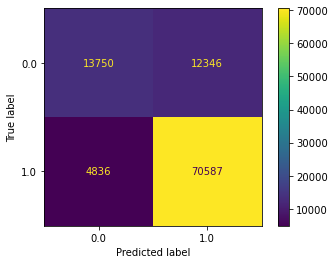

In [11]:
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
plot_confusion_matrix(clf, x_test, y_test)
print("Accuracy train: ", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

The accuracy in both the train and the test sets has been pretty similar. It looks like there is no severe overfitting or underfitting, which is good news. There could be some underfitting because of a higher accuracy with the test set, but the difference is minumun.
Only 4836 of fully paid loans (6%) have misplaced, while the 47% of defaults have been identified as paid loans. This model definetly had some issues classifying the observations.

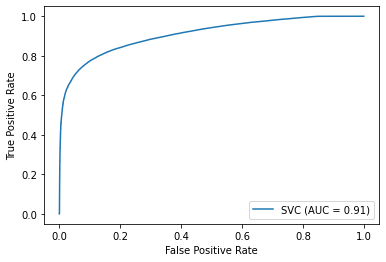

In [12]:
metrics.plot_roc_curve(clf, x_test, y_test)
plt.show() 

In [13]:
import pickle

def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [14]:
save_models('svm_model.sav', clf)